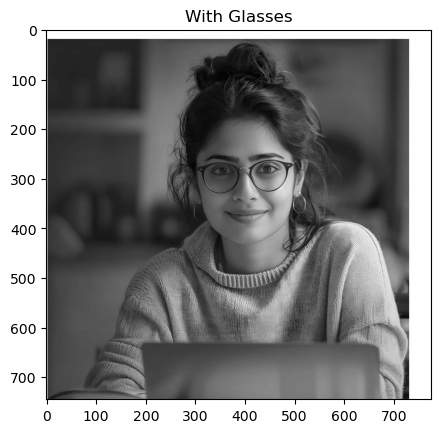

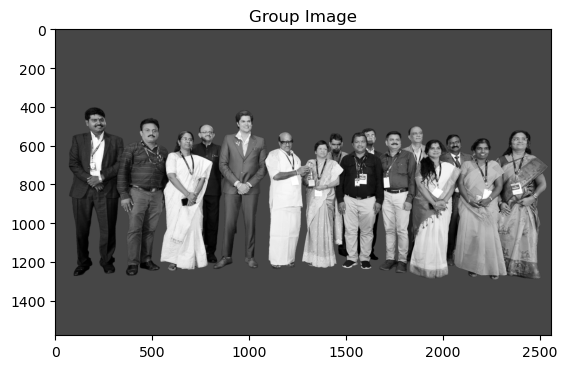

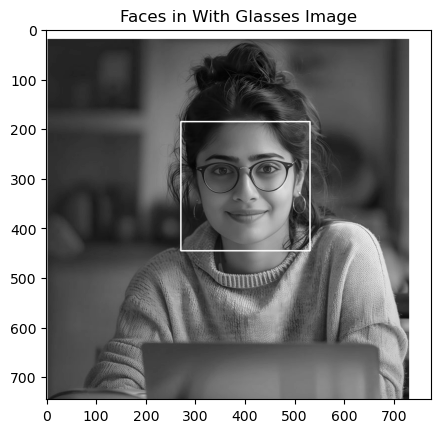

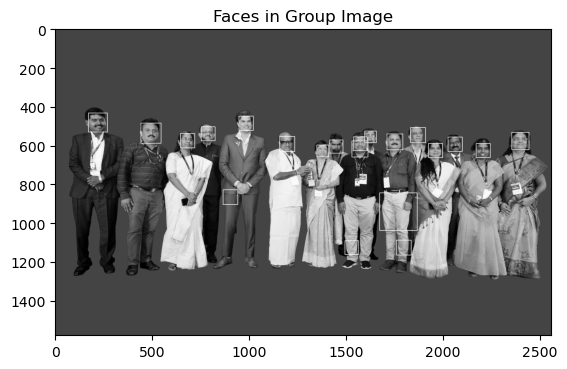

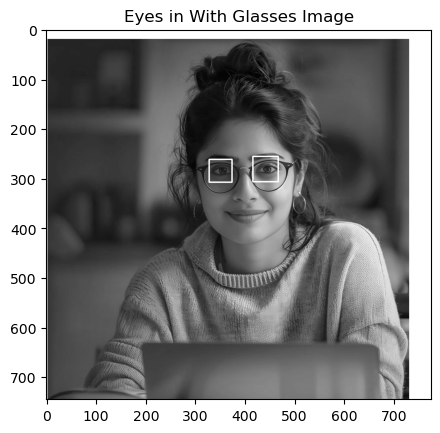

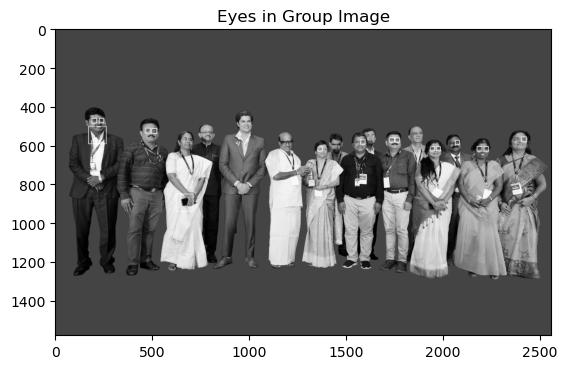

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

withglass = cv2.imread(r"C:\Users\admin\Downloads\image_02.png", 0)
group = cv2.imread(r"C:\Users\admin\Downloads\image_03.png", 0)

plt.imshow(withglass, cmap='gray')
plt.title("With Glasses")
plt.show()

plt.imshow(group, cmap='gray')
plt.title("Group Image")
plt.show()

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

if face_cascade.empty():
    raise IOError("Error loading face cascade XML file")
if eye_cascade.empty():
    raise IOError("Error loading eye cascade XML file")

def detect_face(img, scaleFactor=1.1, minNeighbors=5):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=scaleFactor, minNeighbors=minNeighbors)
    for (x, y, w, h) in face_rects:
        cv2.rectangle(face_img, (x, y), (x + w, y + h), (255, 255, 255), 2)
    return face_img

def detect_eyes(img):
    face_img = img.copy()
    eyes = eye_cascade.detectMultiScale(face_img)
    for (x, y, w, h) in eyes:
        cv2.rectangle(face_img, (x, y), (x + w, y + h), (255, 255, 255), 2)
    return face_img

result_withglass_faces = detect_face(withglass)
plt.imshow(result_withglass_faces, cmap='gray')
plt.title("Faces in With Glasses Image")
plt.show()

result_group_faces = detect_face(group)
plt.imshow(result_group_faces, cmap='gray')
plt.title("Faces in Group Image")
plt.show()

result_withglass_eyes = detect_eyes(withglass)
plt.imshow(result_withglass_eyes, cmap='gray')
plt.title("Eyes in With Glasses Image")
plt.show()

result_group_eyes = detect_eyes(group)
plt.imshow(result_group_eyes, cmap='gray')
plt.title("Eyes in Group Image")
plt.show()
